# Small Group Optimization Using Integer Programming

In [920]:
import pulp
import random

## Generate example data. Comment out next block if using real data.

In [921]:
# # Example Data
# students = [f"Student {i}" for i in range(1, 31)]
# leaders = [f"Leader {i}" for i in range(1, 7)]
# peers = students  # Peers are the same as students
# leader_capacity = {f"Leader {i}": 5 for i in range(1, 7)}  # 5 students per leader
# max_peers = (len(students) - (len(students)%len(leaders)) )/ len(leaders) -1 # Maximum number of peers per student
# 
# # Ranking data for students and leaders
# # Randomly generated rankings for the purpose of this example
# students_rankings = {
#     f"Student {i}": random.sample(leaders, 3)  # Random leader rankings for each student
#     for i in range(1, 31)
# }
# print(students_rankings)
# # Peer score matrix (simplified example, assuming random scores between students)
# # Peer score assignment: one peer gets 3, one gets 2, one gets 1, rest get 0
# leader_score = {}
# peer_score = {}
# # Use .index() if the leader is in the list; otherwise, return 0 (or some default reward)
# 
# for i in students:
#     peer_score[i] = {}
#     leader_score[i] = {}
#     available_peers = [s for s in students if s != i]
#     ranked_peers = random.sample(available_peers, 3)
#     
#     for leader in leaders:
#         if students_rankings[i][0] == leader:
#             leader_score[i][leader] = 3
#         elif students_rankings[i][1] == leader:
#             leader_score[i][leader] = 2
#         elif students_rankings[i][2] == leader:
#             leader_score[i][leader] = 1
#         else:
#             leader_score[i][leader] = 0
#     
#     for j in available_peers:
#         if j == ranked_peers[0]:
#             peer_score[i][j] = 3
#         elif j == ranked_peers[1]:
#             peer_score[i][j] = 2
#         elif j == ranked_peers[2]:
#             peer_score[i][j] = 1
#         else:
#             peer_score[i][j] = 0
# 
# 
# # Output for verification
# print("Students Rankings:")
# for student, rankings in students_rankings.items():
#     print(f"{student}: {rankings}")
# 
# print("\nPeer Scores:")
# for student, scores in peer_score.items():
#     print(f"{student}: {scores}")
#     


## -------------------------- Sample Data Ends ----------------------------

# Preprocessing data
Take in surveys and reformat into sample format. Comment out this section if dealing with sample data.

In [922]:
import pandas as pd

df= pd.read_csv("students.csv")
df.head()

,Author,L1,L2,L3,P1,P2,P3
0,Student 1,Leader 2,Leader 5,Leader 1,Student 30,Student 49,Student 14
1,Student 2,Leader 2,Leader 1,Leader 3,Student 18,Student 15,Student 33
2,Student 3,Leader 1,Leader 4,Leader 2,Student 27,Student 17,Student 45
3,Student 4,Leader 3,Leader 3,Leader 3,Student 27,Student 21,Student 9
4,Student 5,Leader 6,Leader 2,Leader 1,Student 45,Student 34,Student 49


In [923]:
students = [f"Student {i}" for i in range(1, df.shape[0]+1)]
leaders = [f"Leader {i}" for i in range(1, 8)]
peers = students  # Peers are the same as students
leader_capacity = {f"Leader {i}": 7 for i in range(1, 8)}  # 7 students per leader
max_peers = (len(students) - (len(students)%len(leaders)) )/ len(leaders) -1 # Maximum number of peers per student
leader_score={}
peer_score={}


for i in students: # Index each entry
    row = df[df["Author"] == i].iloc[0]
    students_rankings = {
    i: [row["L1"], row["L2"], row["L3"]]  # Random leader rankings for each student
    }
    leader_score[row["Author"]] = {}
    peer_score[row["Author"]] = {}
    available_peers = [s for s in students if s != i]
    ranked_peers = [row["P1"], row["P2"], row["P3"]]
    print(students_rankings)
    for leader in leaders:
        if students_rankings[i][0] == leader:
            leader_score[row["Author"]][leader] = 3
        elif students_rankings[i][1] == leader:
            leader_score[row["Author"]][leader] = 2
        elif students_rankings[i][2] == leader:
            leader_score[row["Author"]][leader] = 1
        else:
            leader_score[row["Author"]][leader] = 0

    for j in available_peers:
        if j == ranked_peers[0]:
            peer_score[i][j] = 3
        elif j == ranked_peers[1]:
            peer_score[i][j] = 2
        elif j == ranked_peers[2]:
            peer_score[i][j] = 1
        else:
            peer_score[i][j] = 0

# Define getting leader
def get_leader_reward(student, leader, leaders_list):
    try:
        return len(leaders_list) - student.index(leader)
    except ValueError:
        return 0  # or a default value if the leader isn't ranked


leader_score

{'Student 1': ['Leader 2', 'Leader 5', 'Leader 1']}
{'Student 2': ['Leader 2', 'Leader 1', 'Leader 3']}
{'Student 3': ['Leader 1', 'Leader 4', 'Leader 2']}
{'Student 4': ['Leader 3', 'Leader 3', 'Leader 3']}
{'Student 5': ['Leader 6', 'Leader 2', 'Leader 1']}
{'Student 6': ['Leader 2', 'Leader 4', 'Leader 7']}
{'Student 7': ['Leader 1', 'Leader 3', 'Leader 6']}
{'Student 8': ['Leader 3', 'Leader 1', 'Leader 2']}
{'Student 9': ['Leader 2', 'Leader 4', 'Leader 3']}
{'Student 10': [nan, nan, nan]}
{'Student 11': ['Leader 7', 'Leader 1', 'Leader 3']}
{'Student 12': ['Leader 1', 'Leader 6', 'Leader 2']}
{'Student 13': ['Leader 7', 'Leader 2', 'Leader 5']}
{'Student 14': ['Leader 4', 'Leader 5', 'Leader 1']}
{'Student 15': ['Leader 3', 'Leader 1', 'Leader 2']}
{'Student 16': ['Leader 1', 'Leader 3', 'Leader 6']}
{'Student 17': ['Leader 5', 'Leader 3', 'Leader 4']}
{'Student 18': ['Leader 2', 'Leader 3', 'Leader 6']}
{'Student 19': ['Leader 4', 'Leader 2', 'Leader 7']}
{'Student 20': ['Leader

{'Student 1': {'Leader 1': 1,
  'Leader 2': 3,
  'Leader 3': 0,
  'Leader 4': 0,
  'Leader 5': 2,
  'Leader 6': 0,
  'Leader 7': 0},
 'Student 2': {'Leader 1': 2,
  'Leader 2': 3,
  'Leader 3': 1,
  'Leader 4': 0,
  'Leader 5': 0,
  'Leader 6': 0,
  'Leader 7': 0},
 'Student 3': {'Leader 1': 3,
  'Leader 2': 1,
  'Leader 3': 0,
  'Leader 4': 2,
  'Leader 5': 0,
  'Leader 6': 0,
  'Leader 7': 0},
 'Student 4': {'Leader 1': 0,
  'Leader 2': 0,
  'Leader 3': 3,
  'Leader 4': 0,
  'Leader 5': 0,
  'Leader 6': 0,
  'Leader 7': 0},
 'Student 5': {'Leader 1': 1,
  'Leader 2': 2,
  'Leader 3': 0,
  'Leader 4': 0,
  'Leader 5': 0,
  'Leader 6': 3,
  'Leader 7': 0},
 'Student 6': {'Leader 1': 0,
  'Leader 2': 3,
  'Leader 3': 0,
  'Leader 4': 2,
  'Leader 5': 0,
  'Leader 6': 0,
  'Leader 7': 1},
 'Student 7': {'Leader 1': 3,
  'Leader 2': 0,
  'Leader 3': 2,
  'Leader 4': 0,
  'Leader 5': 0,
  'Leader 6': 1,
  'Leader 7': 0},
 'Student 8': {'Leader 1': 2,
  'Leader 2': 1,
  'Leader 3': 3,
  'Le

## ---------------------------- Preprocessing Ends ----------------------------- 

# Initialize the problem

In [924]:
prob = pulp.LpProblem("Student_Leader_Peer_Assignment", pulp.LpMaximize)


## Decision variables:
 x[i][leader] = 1 if student i is assigned to leader; 0 otherwise.
 This is a binary variable.


In [925]:
x = pulp.LpVariable.dicts("x", (students, leaders), cat="Binary")

And then y[i][peer] = 1 if student i is assigned to peer; 0 otherwise

In [926]:
# y = pulp.LpVariable.dicts("y", (students, peers), cat="Binary")

y = pulp.LpVariable.dicts("y", [(i, j) for i in students for j in students if i < j], cat="Binary")


# Objective function (maximizing the reward):
###### We'll assume utility/reward is based on student leader preferences and peer preferences.
# We will maximize the total reward, which includes both the leader ranking (preference) and peer score

In [927]:
prob += pulp.lpSum(
    leader_score[i][leader] * x[i][leader]
    for i in students for leader in leaders
) + pulp.lpSum(
    peer_score[i][peer] * y[(i, peer)]  # Peer score is the reward for peer assignments
    for i in students for peer in peers if i < peer  # Exclude self-peer assignments
), "Total Reward"


# Constraints


## Each student must be assigned to exactly one leader


In [928]:
for i in students:
    prob += pulp.lpSum(x[i][leader] for leader in leaders) == 1

# Each student can have at most max_peers number of peers

In [929]:
# for i in students:
#     prob += pulp.lpSum(y[i][peer] for peer in peers) <= max_peers

for i in students:
    prob += (
        pulp.lpSum(y[(i, j)] for j in students if i < j) +
        pulp.lpSum(y[(j, i)] for j in students if j < i)
    ) <= max_peers, f"Max_Peers_{i}"

# Each leader can have at most their capacity of students

In [930]:
for leader in leaders:
    prob += pulp.lpSum(x[i][leader] for i in students) <= leader_capacity[leader]


# Specifying that if someone chooses to be peers in a group, they must be in the same group
If y[i][peer] = 1, then x[i][l] == x[peer][l] for all leaders l


In [931]:
M = 2  # Big constant

for i in range(len(students)):
    for j in range(i + 1, len(students)):  # Only iterate where i < j by index
        s_i = students[i]
        s_j = students[j]
        # Ensure the key is ordered lexicographically (as you defined y)
        key = (s_i, s_j) if s_i < s_j else (s_j, s_i)
        for l in range(len(leaders)):
            leader = leaders[l]
            # Enforce: if y[key] == 1, then x[s_i][leader] == x[s_j][leader]
            prob += x[s_i][leader] - x[s_j][leader] <= M * (1 - y[key]), f"PeerLeaderConsist_{s_i}_{s_j}_{leader}_1"
            prob += x[s_j][leader] - x[s_i][leader] <= M * (1 - y[key]), f"PeerLeaderConsist_{s_i}_{s_j}_{leader}_2"
            
            # Enforce: if both s_i and s_j are in the same leader group then y[key] must be 1
            prob += x[s_i][leader] + x[s_j][leader] - y[key] <= 1, f"Enforce_y_if_same_group_{s_i}_{s_j}_{leader}"



We can ask PuLP to solve the problem now that objective function, decision variables, and constraints are defined 

# SOLVE


In [932]:
prob.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/cheuklo/miniconda3/lib/python3.12/site-packages/pulp/apis/../solverdir/cbc/osx/i64/cbc /var/folders/ny/ypcflj450279zy_8kbr2zsh80000gn/T/a623526a37b94c6d9b9a4dd919a713cb-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/ny/ypcflj450279zy_8kbr2zsh80000gn/T/a623526a37b94c6d9b9a4dd919a713cb-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 24806 COLUMNS
At line 105164 RHS
At line 129966 BOUNDS
At line 131486 ENDATA
Problem MODEL has 24801 rows, 1519 columns and 77126 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 204.866 - 0.16 seconds
Cgl0003I 0 fixed, 0 tightened bounds, 159 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 72 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 27 strengthened rows, 0 substitu

1

# We have the output:

In [933]:
# # Output the results:
# if pulp.LpStatus[prob.status] == "Optimal":
#     print("Solution found:")
#     for i in students:
#         # Get the assigned leader
#         assigned_leader = [leader for leader in leaders if pulp.value(x[i][leader]) == 1][0]
#         print(f"{i} is assigned to {assigned_leader}")
#         # Get the assigned peers
#         assigned_peers = [peer for peer in peers if pulp.value(y[(i,peer)]) == 1]
#         print(f"Peers: {assigned_peers}")
# else:
#     print("No optimal solution found")


print("Leader Assignments:")
for s in students:
    # Find the leader for which x[s][leader] == 1 (assuming each student is assigned to exactly one leader)
    assigned_leader = None
    for l in leaders:
        if pulp.value(x[s][l]) == 1:
            assigned_leader = l
            break
    print(f"{s} is assigned to {assigned_leader}")

# Next, reconstruct the peer pairings from y.
# Since y is defined for (i, j) with i < j, we'll build a dictionary mapping each student to a list of paired peers.
peer_pairs = {s: [] for s in students}
for (s_i, s_j) in y.keys():
    if pulp.value(y[(s_i, s_j)]) == 1:
        peer_pairs[s_i].append(s_j)
        peer_pairs[s_j].append(s_i)

# Now, print out the peer pairing information.
print("\nPeer Pairings:")
for s in students:
    # Sort the peer list for clarity
    paired_peers = sorted(peer_pairs[s])
    print(f"{s} is paired with: {paired_peers}")

Leader Assignments:
Student 1 is assigned to Leader 5
Student 2 is assigned to Leader 1
Student 3 is assigned to Leader 1
Student 4 is assigned to Leader 3
Student 5 is assigned to Leader 6
Student 6 is assigned to Leader 2
Student 7 is assigned to Leader 3
Student 8 is assigned to Leader 5
Student 9 is assigned to Leader 2
Student 10 is assigned to Leader 6
Student 11 is assigned to Leader 7
Student 12 is assigned to Leader 6
Student 13 is assigned to Leader 7
Student 14 is assigned to Leader 5
Student 15 is assigned to Leader 5
Student 16 is assigned to Leader 1
Student 17 is assigned to Leader 5
Student 18 is assigned to Leader 2
Student 19 is assigned to Leader 4
Student 20 is assigned to Leader 2
Student 21 is assigned to Leader 7
Student 22 is assigned to Leader 5
Student 23 is assigned to Leader 6
Student 24 is assigned to Leader 4
Student 25 is assigned to Leader 3
Student 26 is assigned to Leader 1
Student 27 is assigned to Leader 4
Student 28 is assigned to Leader 3
Student 2

# Result Analysis
This section is dedicated to find the spread of individual contribution to the objective value

In [935]:
import pulp
import statistics

# Assuming your variables are:
# students: list of student names
# leaders: list of leader names
# peers: list of peer names (usually same as students)
# students_rankings: dictionary mapping each student to their ranking of leaders
# peer_score: dictionary mapping each student to a dictionary of peer scores
# x: decision variable dictionary for leader assignments (x[i][l])
# y: decision variable dictionary for peer assignments (y[i][j]) 
#       If you use the symmetric version (for all i != j) or the i<j version, adjust accordingly.

# Create a dictionary to store contributions for each student
individual_contributions = {}

# Loop over each student to compute their contribution
for i in students:
    contribution = 0
    # Leader assignment contribution:
    # We assume each student is assigned to exactly one leader, so x[i][l] is 1 for one l and 0 otherwise.
    for l in leaders:
        # Use .index() to get the ranking position, then convert it to a reward.
        # Here, a lower index means higher reward.
        # For example, if there are 3 leaders and the student ranked leader l as their 1st choice,
        # reward = len(leaders) - index = 3 - 0 = 3.
        if l in leader_score[i]:
            reward = leader_score[i][l]
        
        else:
            reward = 0  # or some default value if the leader is not ranked
        contribution += reward * pulp.value(x[i][l])
    
    # Peer assignment contribution:
    # For symmetric y:
    for j in students:
        if j != i:
            if i < j:
                contribution += peer_score[i][j] * pulp.value(y[(i, j)])
            else:  # j < i
                contribution += peer_score[i][j] * pulp.value(y[(j, i)])
    individual_contributions[i] = contribution

# Print out each student's contribution
print("Individual Contributions:")
for i, contrib in individual_contributions.items():
    print(f"{i}: {contrib}")

# Calculate the mean and standard deviation of contributions
mean_contrib = statistics.mean(individual_contributions.values())
std_contrib = statistics.stdev(individual_contributions.values())

print(f"\nMean Contribution: {mean_contrib}")
print(f"Standard Deviation: {std_contrib}")


Individual Contributions:
Student 1: 5.0
Student 2: 3.0
Student 3: 4.0
Student 4: 3.0
Student 5: 3.0
Student 6: 5.0
Student 7: 4.0
Student 8: 0.0
Student 9: 3.0
Student 10: 0.0
Student 11: 9.0
Student 12: 5.0
Student 13: 5.0
Student 14: 7.0
Student 15: 2.0
Student 16: 8.0
Student 17: 8.0
Student 18: 8.0
Student 19: 6.0
Student 20: 6.0
Student 21: 0.0
Student 22: 6.0
Student 23: 0.0
Student 24: 7.0
Student 25: 5.0
Student 26: 7.0
Student 27: 5.0
Student 28: 6.0
Student 29: 0.0
Student 30: 5.0
Student 31: 6.0
Student 32: 7.0
Student 33: 3.0
Student 34: 5.0
Student 35: 5.0
Student 36: 4.0
Student 37: 2.0
Student 38: 6.0
Student 39: 5.0
Student 40: 5.0
Student 41: 0.0
Student 42: 3.0
Student 43: 0.0
Student 44: 1.0
Student 45: 5.0
Student 46: 5.0
Student 47: 2.0
Student 48: 5.0
Student 49: 1.0

Mean Contribution: 4.183673469387755
Standard Deviation: 2.472123491620742


# Visualization


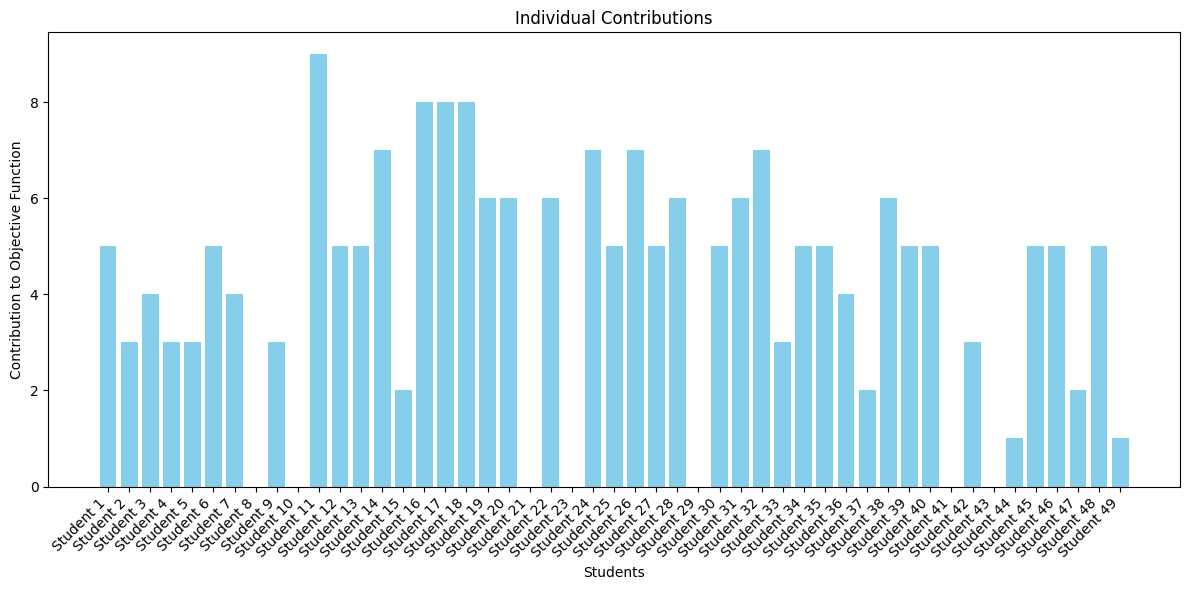

In [936]:
import matplotlib.pyplot as plt

# Suppose individual_contributions is a dictionary with keys as student names and values as contributions.
# For example:
# individual_contributions = {
#     "Student 1": 10.5,
#     "Student 2": 8.2,
#     "Student 3": 12.3,
#     "Student 4": 9.7,
#     ...
# }

# Extract the student names and their contribution values
students_list = list(individual_contributions.keys())
contributions = list(individual_contributions.values())

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(students_list, contributions, color='skyblue')
plt.xlabel("Students")
plt.ylabel("Contribution to Objective Function")
plt.title("Individual Contributions")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


# Debug (Scratch Works)


In [ ]:
# for name, variable in prob.LpVariable.items():
#     print(f"{name}: {variable}")